In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's import the data we cleaned up from the last time, and use the head function to show the first few values

In [2]:
df = pd.read_csv('../PANDAS/data/date_fixed_running_data.csv')
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


As we can see the DataFrame hasn't imported the exact way we saved it. Let's first check to see if the data is in the same type format as before. 

In [3]:
df.dtypes

Unnamed: 0     object
Miles         float64
Time           object
dtype: object

For this dataset it is more effeinct to reparse the set before renaming the columns. Let's do that now

Parse the "Unnamed: 0" column into a date format and then double check that all of the columns are in the expected format. 


In [4]:
df = pd.read_csv('../PANDAS/data/date_fixed_running_data.csv', parse_dates=[0])
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


In [5]:
df.dtypes

Unnamed: 0    datetime64[ns]
Miles                float64
Time                  object
dtype: object

In [6]:
col= ['Date', 'Miles', 'Time']
df.columns= col
df.head()

,Date,Miles,Time
0,2014-08-01,0.0,NaN
1,2014-08-02,1.7,NaN
2,2014-08-03,1.4,NaN
3,2014-08-04,2.1,NaN
4,2014-08-05,0.0,NaN


In [7]:
#alternatively can change column name by doing:
df.rename(columns={df.columns[0]:'Date'}, inplace=True)

Now check to see the dtype of our Date column to see if it still has the datetime type. 

In [8]:
df.dtypes
# df['Date'].head()

Date     datetime64[ns]
Miles           float64
Time             object
dtype: object

After double-checking that the column 'Date' has the dtype datetime let's index the DataFrame by 'Date' again 

Then plot the function, this should look like our last plot from Tutorial 1

(0, 30)

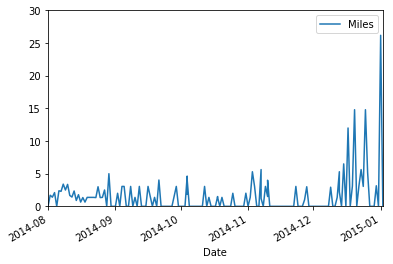

In [9]:
df.set_index('Date', inplace=True)
df.plot()
plt.ylim((0,30))

Now that we have some of the basics down let's start manipulating this dataset further. 

First let's look examine the time column and try to get a sense of minutes per mile. If you think you have a sense of how to do this keep going and ignore my comments.

In the time column, there are a fair amount of NaN values, for now we are going to use a map function to --- them out and with the remaining data we are going to translate it all into seconds

I provided you with a fucntion to do this feel free to write your own as well. Try to understand the map funciton as well.

In [11]:
time_general = df.Time[0]

def total_seconds(time):
    if time is np.nan:
        return np.nan # if it's blank, keep it blank
    hrs, mins, seconds = str(time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds    
print(total_seconds(time_general))

nan


Great! Now let's add that calculation to as a column to our dataframe and print out the first 15 values to make sure it is working

In [12]:
df['Seconds']=df.Time.map(get_total_seconds)
df.head(15)

,Miles,Time,Seconds
Date,,,
2014-08-01,0.00,NaN,NaN
2014-08-02,1.70,NaN,NaN
2014-08-03,1.40,NaN,NaN
2014-08-04,2.10,NaN,NaN
2014-08-05,0.00,NaN,NaN
2014-08-06,2.38,NaN,NaN
2014-08-07,2.30,NaN,NaN
2014-08-08,3.40,NaN,NaN
2014-08-09,2.50,NaN,NaN


Now let's use the describe function to describe the dataset

In [13]:
df.describe()

,Miles,Seconds
count,168.000000,52.000000
mean,1.512738,1901.788462
std,2.966583,2560.424171
min,0.000000,376.000000
25%,0.000000,583.750000
50%,0.000000,1343.500000
75%,2.002500,1743.250000
max,26.200000,15643.000000


as you can tell the np.NaN's were simply ignored, this is really useful and better than filling the empty values with zeros as this could change the statistics.

If you want to see how much this changes the statisitics, use a fill function of choice to fill in the NaNs and describe the DataFrame again, just ensure you aren't using inplace=True this time


In [19]:
df.fillna(0).describe()

,Miles,Seconds,Minutes
count,168.000000,168.000000,168.000000
mean,1.512738,588.648810,9.810813
std,2.966583,1667.233874,27.787231
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.002500,557.250000,9.287500
max,26.200000,15643.000000,260.716667


Now let's make a new column that is in Minutes, we can do this by dividing the seconds column by 60. 

After adding the column, describe the dataframe then plot the DataFrame using a scatter plot with miles on the x-axis and minutes graphed on the y.

In [22]:
df['Minutes']=df['Seconds']/60

In [23]:
df.describe()

,Miles,Seconds,Minutes
count,168.000000,52.000000,52.000000
mean,1.512738,1901.788462,31.696474
std,2.966583,2560.424171,42.673736
min,0.000000,376.000000,6.266667
25%,0.000000,583.750000,9.729167
50%,0.000000,1343.500000,22.391667
75%,2.002500,1743.250000,29.054167
max,26.200000,15643.000000,260.716667


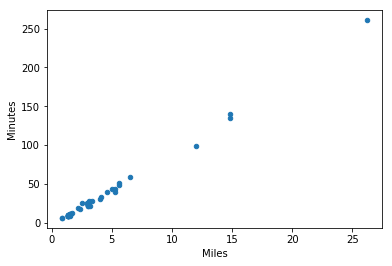

In [24]:
df.plot(x='Miles', y='Minutes', kind='scatter')

We can test the correlation of the dataset using .corr, try it out

In [25]:
df.corr()

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


now let's figure out minutes per mile we can to do this we can divide the columns, set Minutes_per_Mile to be a new column. 

Then describe the DataFrame and plot it using a scatter plot again with miles on the x axis and Minitues per Mile described on the y

In [30]:
df['Minutes_per_Mile']=df['Minutes']/df['Miles']
df.describe()

,Miles,Seconds,Minutes,Minutes_per_Mile
count,168.000000,52.000000,52.000000,52.000000
mean,1.512738,1901.788462,31.696474,7.725297
std,2.966583,2560.424171,42.673736,0.954475
min,0.000000,376.000000,6.266667,6.000000
25%,0.000000,583.750000,9.729167,7.020479
50%,0.000000,1343.500000,22.391667,7.533333
75%,2.002500,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


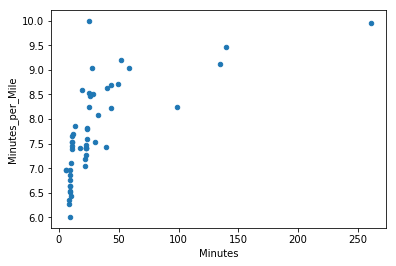

In [31]:
df.plot(x='Minutes', y='Minutes_per_Mile', kind='scatter')

We can also use a histogram describe this dataset. PANADS defaults to 10 bins but the set might be best described using 20 bins. 

Plot the 'minutes per mile column' using a histogram with 20 bins


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b371278>]], dtype=object)

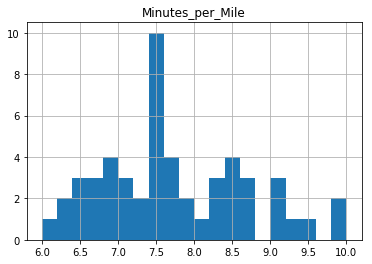

In [35]:
df.hist('Minutes_per_Mile', bins=20)